Member: (50 pts) (Each question 10 pts, markdown 10 pts)
Generate weekly statistics (mean, median, mode) for number of cases and deaths across a specific "state".

Compare the data against other states (compare against 5 states). Normalize by population, use a normalization factor which is able to identify cases and deaths, for example try per 10,000 or 100,000 (this depends on the population). Plot the values across the weeks in a line plot for the 5 states in a single graph. Describe why the rates differ across these states in the notebook. Identify the peaks, do they compare with the US pattern?


Identify five counties within a state of your choice with high cases and death rates.
Plot weekly trends (cases and deaths) for the top 5 infected counties. Show plots by raw values and log normalized values. Describe what is causing them and what were the peaks. Do the counties follow state pattern.

Dates:   2020, July - 2020, December

In [1]:
# libraries & settings

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt 
import datetime as dt



pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

 #Task:  Generate weekly statistics (mean, median, mode) for number of cases and deaths across a specific "state".
 
 I am choosing California.


In [2]:
df = pd.read_csv('ProjectDataStage1WIDEFORMAT.csv')

In [3]:
df.head()

,Unnamed: 0,countyFIPS,County Name,State,population,2020-01-22_Cases,2020-01-23_Cases,2020-01-24_Cases,2020-01-25_Cases,2020-01-26_Cases,2020-01-27_Cases,2020-01-28_Cases,2020-01-29_Cases,2020-01-30_Cases,2020-01-31_Cases,2020-02-01_Cases,2020-02-02_Cases,2020-02-03_Cases,2020-02-04_Cases,2020-02-05_Cases,2020-02-06_Cases,2020-02-07_Cases,2020-02-08_Cases,2020-02-09_Cases,2020-02-10_Cases,2020-02-11_Cases,2020-02-12_Cases,2020-02-13_Cases,2020-02-14_Cases,2020-02-15_Cases,2020-02-16_Cases,2020-02-17_Cases,2020-02-18_Cases,2020-02-19_Cases,2020-02-20_Cases,2020-02-21_Cases,2020-02-22_Cases,2020-02-23_Cases,2020-02-24_Cases,2020-02-25_Cases,2020-02-26_Cases,2020-02-27_Cases,2020-02-28_Cases,2020-02-29_Cases,2020-03-01_Cases,2020-03-02_Cases,2020-03-03_Cases,2020-03-04_Cases,2020-03-05_Cases,2020-03-06_Cases,2020-03-07_Cases,2020-03-08_Cases,2020-03-09_Cases,2020-03-10_Cases,2020-03-11_Cases,2020-03-12_Cases,2020-03-13_Cases,2020-03-14_Cases,2020-03-15_Cases,2020-03-16_Cases,2020-03-17_Cases,2020-03-18_Cases,2020-03-19_Cases,2020-03-20_Cases,2020-03-21_Cases,2020-03-22_Cases,2020-03-23_Cases,2020-03-24_Cases,2020-03-25_Cases,2020-03-26_Cases,2020-03-27_Cases,2020-03-28_Cases,2020-03-29_Cases,2020-03-30_Cases,2020-03-31_Cases,2020-04-01_Cases,2020-04-02_Cases,2020-04-03_Cases,2020-04-04_Cases,2020-04-05_Cases,2020-04-06_Cases,2020-04-07_Cases,2020-04-08_Cases,2020-04-09_Cases,2020-04-10_Cases,2020-04-11_Cases,2020-04-12_Cases,2020-04-13_Cases,2020-04-14_Cases,2020-04-15_Cases,2020-04-16_Cases,2020-04-17_Cases,2020-04-18_Cases,2020-04-19_Cases,2020-04-20_Cases,2020-04-21_Cases,2020-04-22_Cases,2020-04-23_Cases,2020-04-24_Cases,2020-04-25_Cases,2020-04-26_Cases,2020-04-27_Cases,2020-04-28_Cases,2020-04-29_Cases,2020-04-30_Cases,2020-05-01_Cases,2020-05-02_Cases,2020-05-03_Cases,2020-05-04_Cases,2020-05-05_Cases,2020-05-06_Cases,2020-05-07_Cases,2020-05-08_Cases,2020-05-09_Cases,2020-05-10_Cases,2020-05-11_Cases,2020-05-12_Cases,2020-05-13_Cases,2020-05-14_Cases,2020-05-15_Cases,2020-05-16_Cases,2020-05-17_Cases,2020-05-18_Cases,2020-05-19_Cases,2020-05-20_Cases,2020-05-21_Cases,2020-05-22_Cases,2020-05-23_Cases,2020-05-24_Cases,2020-05-25_Cases,2020-05-26_Cases,2020-05-27_Cases,2020-05-28_Cases,2020-05-29_Cases,2020-05-30_Cases,2020-05-31_Cases,2020-06-01_Cases,2020-06-02_Cases,2020-06-03_Cases,2020-06-04_Cases,2020-06-05_Cases,2020-06-06_Cases,2020-06-07_Cases,2020-06-08_Cases,2020-06-09_Cases,2020-06-10_Cases,2020-06-11_Cases,2020-06-12_Cases,2020-06-13_Cases,2020-06-14_Cases,2020-06-15_Cases,2020-06-16_Cases,2020-06-17_Cases,2020-06-18_Cases,2020-06-19_Cases,2020-06-20_Cases,2020-06-21_Cases,2020-06-22_Cases,2020-06-23_Cases,2020-06-24_Cases,2020-06-25_Cases,2020-06-26_Cases,2020-06-27_Cases,2020-06-28_Cases,2020-06-29_Cases,2020-06-30_Cases,2020-07-01_Cases,2020-07-02_Cases,2020-07-03_Cases,2020-07-04_Cases,2020-07-05_Cases,2020-07-06_Cases,2020-07-07_Cases,2020-07-08_Cases,2020-07-09_Cases,2020-07-10_Cases,2020-07-11_Cases,2020-07-12_Cases,2020-07-13_Cases,2020-07-14_Cases,2020-07-15_Cases,2020-07-16_Cases,2020-07-17_Cases,2020-07-18_Cases,2020-07-19_Cases,2020-07-20_Cases,2020-07-21_Cases,2020-07-22_Cases,2020-07-23_Cases,2020-07-24_Cases,2020-07-25_Cases,2020-07-26_Cases,2020-07-27_Cases,2020-07-28_Cases,2020-07-29_Cases,2020-07-30_Cases,2020-07-31_Cases,2020-08-01_Cases,2020-08-02_Cases,2020-08-03_Cases,2020-08-04_Cases,2020-08-05_Cases,2020-08-06_Cases,2020-08-07_Cases,2020-08-08_Cases,2020-08-09_Cases,2020-08-10_Cases,2020-08-11_Cases,2020-08-12_Cases,2020-08-13_Cases,2020-08-14_Cases,2020-08-15_Cases,2020-08-16_Cases,2020-08-17_Cases,2020-08-18_Cases,2020-08-19_Cases,2020-08-20_Cases,2020-08-21_Cases,2020-08-22_Cases,2020-08-23_Cases,2020-08-24_Cases,2020-08-25_Cases,2020-08-26_Cases,2020-08-27_Cases,2020-08-28_Cases,2020-08-29_Cases,2020-08-30_Cases,2020-08-31_Cases,2020-09-01_Cases,2020-09-02_Cases,2020-09-03_Cases,2020-09-04_Cases,2020-09-05_Cases,2020-09-06_Cases,2020-09-07_Cases,2020-09-08_Cases,2020-09-09_Cases,2020

In [4]:
df.dtypes

Unnamed: 0            int64
countyFIPS            int64
County Name          object
State                object
population            int64
                      ...  
2023-07-19_Deaths     int64
2023-07-20_Deaths     int64
2023-07-21_Deaths     int64
2023-07-22_Deaths     int64
2023-07-23_Deaths     int64
Length: 2535, dtype: object

In [5]:
# Function to summarize data frames
# mode is not an agg function in pandas, so we will have to create an alternate way to acieve that

def nullcounts(ser):
    return ser.isnull().sum()

def custom_describe(frame, func=[nullcounts, 'sum', 'mean', 'median', 'max'],
                    numeric_only=True, **kwargs):
    if numeric_only:
        frame = frame.select_dtypes(include=np.number)
    return frame.agg(func, **kwargs)

In [6]:
# Defining total poplutations
CApop = 39512223
ILpop = 12671821
WYpop = 578759
DEpop = 973764
KYpop = 4467673
MIpop = 9986857

In [7]:
# Filtering df to only contain values for a single state

dfCalifornia = df[df['State']=='CA']
dfIllinois = df[df['State']=='IL']
dfWyoming = df[df['State']=='WY']
dfDelaware = df[df['State']=='DE']
dfKentucky= df[df['State']=='KY']
dfMichigan = df[df['State']=='MI']


# Creating summary data for each state

dfCalifornia = custom_describe(dfCalifornia)
dfIllinois = custom_describe(dfIllinois)
dfWyoming = custom_describe(dfWyoming)
dfDelaware = custom_describe(dfDelaware)
dfKentucky= custom_describe(dfKentucky)
dfMichigan = custom_describe(dfMichigan)

# dropping state and county fips
dfCalifornia.drop(['countyFIPS', 'population'], inplace = True, axis = 1)
dfIllinois.drop(['countyFIPS', 'population'], inplace = True, axis = 1)
dfWyoming.drop(['countyFIPS', 'population'], inplace = True, axis = 1)
dfDelaware.drop(['countyFIPS', 'population'], inplace = True, axis = 1)
dfKentucky.drop(['countyFIPS', 'population'], inplace = True, axis = 1)
dfMichigan.drop(['countyFIPS', 'population'], inplace = True, axis = 1)

#Transposing data, so dates are row value
dfCalifornia = dfCalifornia.T
dfIllinois = dfIllinois.T
dfWyoming = dfWyoming.T
dfDelaware = dfDelaware.T
dfKentucky = dfKentucky.T
dfMichigan = dfMichigan.T


# Dividing all data by the first row (population) and then multiplying to get per 100,000 people
dfCalifornia = dfCalifornia / CApop * 100000
dfIllinois = dfIllinois / ILpop * 100000
dfWyoming = dfWyoming / WYpop * 100000
dfDelaware = dfDelaware / DEpop * 100000
dfKentucky = dfKentucky / KYpop * 100000
dfMichigan = dfMichigan / MIpop * 100000


# caluculating the difference between rows, to get a delta value for cases.  This turns our data from cumulative to
# daily changes

dfCalifornia = dfCalifornia.diff(periods=1, axis=0)
dfIllinois = dfIllinois.diff(periods=1, axis=0)
dfWyoming = dfWyoming.diff(periods=1, axis=0)
dfDelaware = dfDelaware.diff(periods=1, axis=0)
dfKentucky = dfKentucky.diff(periods=1, axis=0)
dfMichigan = dfMichigan.diff(periods=1, axis=0)

# There is one na item in our dataframe, I am going to drop it
dfCalifornia.dropna(inplace = True)
dfIllinois.dropna(inplace = True)
dfWyoming.dropna(inplace = True)
dfDelaware.dropna(inplace = True)
dfKentucky.dropna(inplace = True)
dfMichigan.dropna(inplace = True)

# resetting index so we can group by date
dfCalifornia.reset_index(inplace = True)
dfIllinois.reset_index(inplace = True)
dfWyoming.reset_index(inplace = True)
dfDelaware.reset_index(inplace = True)
dfKentucky.reset_index(inplace = True)
dfMichigan.reset_index(inplace = True)

# renaming "index" name to date
dfCalifornia.rename(columns={"index": "Date"}, inplace=True)
dfIllinois.rename(columns={"index": "Date"}, inplace=True)
dfWyoming.rename(columns={"index": "Date"}, inplace=True)
dfDelaware.rename(columns={"index": "Date"}, inplace=True)
dfKentucky.rename(columns={"index": "Date"}, inplace=True)
dfMichigan.rename(columns={"index": "Date"}, inplace=True)

# Splitting the data frames for death and cases
dfCaliforniaDeath = dfCalifornia[dfCalifornia['Date'].str.endswith('_Deaths')]
dfIllinoisDeath = dfIllinois[dfIllinois['Date'].str.endswith('_Deaths')]
dfWyomingDeath = dfWyoming[dfWyoming['Date'].str.endswith('_Deaths')]
dfDelawareDeath = dfDelaware[dfDelaware['Date'].str.endswith('_Deaths')]
dfKentuckyDeath = dfKentucky[dfKentucky['Date'].str.endswith('_Deaths')]
dfMichiganDeath = dfMichigan[dfMichigan['Date'].str.endswith('_Deaths')]

dfCaliforniaCase = dfCalifornia[dfCalifornia['Date'].str.endswith('_Cases')]
dfIllinoisCase = dfIllinois[dfIllinois['Date'].str.endswith('_Cases')]
dfWyomingCase = dfWyoming[dfWyoming['Date'].str.endswith('_Cases')]
dfDelawareCase = dfDelaware[dfDelaware['Date'].str.endswith('_Cases')]
dfKentuckyCase = dfKentucky[dfKentucky['Date'].str.endswith('_Cases')]
dfMichiganCase = dfMichigan[dfMichigan['Date'].str.endswith('_Cases')]

# Trimming date names (removing '_cases' and '_deaths')
#df['fruit'] = df['fruit'].str.rstrip('le')

dfCaliforniaDeath['Date'] = dfCaliforniaDeath['Date'].str.rstrip('_Deaths')
dfIllinoisDeath['Date'] = dfIllinoisDeath['Date'].str.rstrip('_Deaths')
dfWyomingDeath['Date'] = dfWyomingDeath['Date'].str.rstrip('_Deaths')
dfDelawareDeath['Date'] = dfDelawareDeath['Date'].str.rstrip('_Deaths')
dfKentuckyDeath['Date'] = dfKentuckyDeath['Date'].str.rstrip('_Deaths')
dfMichiganDeath['Date'] = dfMichiganDeath['Date'].str.rstrip('_Deaths')

dfCaliforniaCase['Date'] = dfCaliforniaCase['Date'].str.rstrip('_Cases')
dfIllinoisCase['Date'] = dfIllinoisCase['Date'].str.rstrip('_Cases')
dfWyomingCase['Date'] = dfWyomingCase['Date'].str.rstrip('_Cases')
dfDelawareCase['Date'] = dfDelawareCase['Date'].str.rstrip('_Cases')
dfKentuckyCase['Date'] = dfKentuckyCase['Date'].str.rstrip('_Cases')
dfMichiganCase['Date'] = dfMichiganCase['Date'].str.rstrip('_Cases')

# changing date to date (not object)
dfCaliforniaDeath['Date']= pd.to_datetime(dfCaliforniaDeath['Date'])- pd.to_timedelta(7, unit='d')
dfIllinoisDeath['Date'] = pd.to_datetime(dfIllinoisDeath['Date'])- pd.to_timedelta(7, unit='d')
dfWyomingDeath['Date'] = pd.to_datetime(dfWyomingDeath['Date'])- pd.to_timedelta(7, unit='d')
dfDelawareDeath['Date'] = pd.to_datetime(dfDelawareDeath['Date'])- pd.to_timedelta(7, unit='d')
dfKentuckyDeath['Date'] = pd.to_datetime(dfKentuckyDeath['Date'])- pd.to_timedelta(7, unit='d')
dfMichiganDeath['Date'] = pd.to_datetime(dfMichiganDeath['Date'])- pd.to_timedelta(7, unit='d')

dfCaliforniaCase['Date']= pd.to_datetime(dfCaliforniaCase['Date'])- pd.to_timedelta(7, unit='d')
dfIllinoisCase['Date'] = pd.to_datetime(dfIllinoisCase['Date'])- pd.to_timedelta(7, unit='d')
dfWyomingCase['Date'] = pd.to_datetime(dfWyomingCase['Date'])- pd.to_timedelta(7, unit='d')
dfDelawareCase['Date'] = pd.to_datetime(dfDelawareCase['Date'])- pd.to_timedelta(7, unit='d')
dfKentuckyCase['Date'] = pd.to_datetime(dfKentuckyCase['Date'])- pd.to_timedelta(7, unit='d')
dfMichiganCase['Date'] = pd.to_datetime(dfMichiganCase['Date'])- pd.to_timedelta(7, unit='d')

# Trimming dates to 2020, July - 2020, December
dfCaliforniaDeath = dfCaliforniaDeath[(dfCaliforniaDeath['Date'] > "2020-07-01") & (dfCaliforniaDeath['Date'] < "2020-12-01")]
dfIllinoisDeath= dfIllinoisDeath[(dfIllinoisDeath['Date'] > "2020-07-01") & (dfIllinoisDeath['Date'] < "2020-12-01")]
dfWyomingDeath=dfWyomingDeath[(dfWyomingDeath['Date'] > "2020-07-01") & (dfWyomingDeath['Date'] < "2020-12-01")]
dfDelawareDeath=dfDelawareDeath[(dfDelawareDeath['Date'] > "2020-07-01") & (dfDelawareDeath['Date'] < "2020-12-01")]
dfKentuckyDeath=dfKentuckyDeath[(dfKentuckyDeath['Date'] > "2020-07-01") & (dfKentuckyDeath['Date'] < "2020-12-01")]
dfMichiganDeath=dfMichiganDeath[(dfMichiganDeath['Date'] > "2020-07-01") & (dfMichiganDeath['Date'] < "2020-12-01")]

dfCaliforniaCase = dfCaliforniaCase[(dfCaliforniaCase['Date'] > "2020-07-01") & (dfCaliforniaCase['Date'] < "2020-12-01")]
dfIllinoisCase=dfIllinoisCase[(dfIllinoisCase['Date'] > "2020-07-01") & (dfIllinoisCase['Date'] < "2020-12-01")]
dfWyomingCase=dfWyomingCase[(dfWyomingCase['Date'] > "2020-07-01") & (dfWyomingCase['Date'] < "2020-12-01")]
dfDelawareCase=dfDelawareCase[(dfDelawareCase['Date'] > "2020-07-01") & (dfDelawareCase['Date'] < "2020-12-01")]
dfKentuckyCase=dfKentuckyCase[(dfKentuckyCase['Date'] > "2020-07-01") & (dfKentuckyCase['Date'] < "2020-12-01")]
dfMichiganCase=dfMichiganCase[(dfMichiganCase['Date'] > "2020-07-01") & (dfMichiganCase['Date'] < "2020-12-01")]



C:\Users\leena\anaconda3\envs\MSIA\lib\site-packages\ipykernel_launcher.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\leena\anaconda3\envs\MSIA\lib\site-packages\ipykernel_launcher.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\leena\anaconda3\envs\MSIA\lib\site-packages\ipykernel_launcher.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [8]:
# dropping first row of death tables
dfCaliforniaDeath = dfCaliforniaDeath.iloc[1:]
dfIllinoisDeath= dfIllinoisDeath.iloc[1:]
dfWyomingDeath= dfWyomingDeath.iloc[1:]
dfKentuckyDeath= dfKentuckyDeath.iloc[1:]
dfDelawareDeath= dfDelawareDeath.iloc[1:]
dfMichiganDeath= dfMichiganDeath.iloc[1:]

In [9]:
dfDelawareDeath.head(1000)

,Date,nullcounts,sum,mean,median,max
1435,2020-07-03,0.0,0.000000,0.000000,0.000000,0.000000
1436,2020-07-04,0.0,-0.102694,-0.025674,-0.051347,0.000000
1437,2020-07-05,0.0,0.000000,0.000000,0.000000,0.000000
1438,2020-07-06,0.0,0.000000,0.000000,0.000000,0.000000
1439,2020-07-07,0.0,0.718860,0.179715,0.205389,0.308083
1440,2020-07-08,0.0,0.308083,0.077021,0.000000,0.308083
1441,2020-07-09,0.0,0.308083,0.077021,0.000000,0.308083
1442,2020-07-10,0.0,0.102694,0.025674,0.051347,0.000000
1443,2020-07-11,0.0,0.102694,0.025674,0.000000,0.102694
1444,2020-07-12,0.0,0.000000,0.000000,0.000000,0.000000


In [10]:
# Grouping delta dataframe by week.  I included "nullcounts" to keep the header names

# Creating MEAN dataset
dfCaliforniaDeathMean = dfCaliforniaDeath.groupby([pd.Grouper(key='Date', freq='W')])['mean', 'nullcounts'].mean()
dfIllinoisDeathMean = dfIllinoisDeath.groupby([pd.Grouper(key='Date', freq='W')])['mean', 'nullcounts'].mean()
dfWyomingDeathMean = dfWyomingDeath.groupby([pd.Grouper(key='Date', freq='W')])['mean', 'nullcounts'].mean()
dfKentuckyDeathMean = dfKentuckyDeath.groupby([pd.Grouper(key='Date', freq='W')])['mean', 'nullcounts'].mean()
dfDelawareDeathMean = dfDelawareDeath.groupby([pd.Grouper(key='Date', freq='W')])['mean', 'nullcounts'].mean()
dfMichiganDeathMean = dfMichiganDeath.groupby([pd.Grouper(key='Date', freq='W')])['mean', 'nullcounts'].mean()

# Creating MEDIAN dataset
#dfDeltaMedian = dfDelta.groupby([pd.Grouper(key='Date', freq='W')])['median', 'nullcounts'].median()
dfCaliforniaDeathMedian = dfCaliforniaDeath.groupby([pd.Grouper(key='Date', freq='W')])['median', 'nullcounts'].median()
dfIllinoisDeathMedian = dfIllinoisDeath.groupby([pd.Grouper(key='Date', freq='W')])['median', 'nullcounts'].median()
dfWyomingDeathMedian = dfWyomingDeath.groupby([pd.Grouper(key='Date', freq='W')])['median', 'nullcounts'].median()
dfKentuckyDeathMedian = dfKentuckyDeath.groupby([pd.Grouper(key='Date', freq='W')])['median', 'nullcounts'].median()
dfDelawareDeathMedian = dfDelawareDeath.groupby([pd.Grouper(key='Date', freq='W')])['median', 'nullcounts'].median()
dfMichiganDeathMedian = dfMichiganDeath.groupby([pd.Grouper(key='Date', freq='W')])['median', 'nullcounts'].median()

# Creating MODE Dataset
#dfDeltaMode = dfDelta.groupby([pd.Grouper(key='Date', freq='W')])['median', 'nullcounts'].agg(pd.Series.mode)
#dfDeltaMode.rename(columns={"median": "mode"}, inplace=True)
dfCaliforniaDeathMode = dfCaliforniaDeath.groupby([pd.Grouper(key='Date', freq='W')])['median', 'nullcounts'].agg(pd.Series.mode)
dfIllinoisDeathMode = dfIllinoisDeath.groupby([pd.Grouper(key='Date', freq='W')])['median', 'nullcounts'].agg(pd.Series.mode)
dfWyomingDeathMode = dfWyomingDeath.groupby([pd.Grouper(key='Date', freq='W')])['median', 'nullcounts'].agg(pd.Series.mode)
dfKentuckyDeathMode = dfKentuckyDeath.groupby([pd.Grouper(key='Date', freq='W')])['median', 'nullcounts'].agg(pd.Series.mode)
dfDelawareDeathMode = dfDelawareDeath.groupby([pd.Grouper(key='Date', freq='W')])['median', 'nullcounts'].agg(pd.Series.mode)
dfMichiganDeathMode = dfMichiganDeath.groupby([pd.Grouper(key='Date', freq='W')])['median', 'nullcounts'].agg(pd.Series.mode)

dfCaliforniaDeathMode.rename(columns={"median": "mode"}, inplace=True)
dfIllinoisDeathMode.rename(columns={"median": "mode"}, inplace=True)
dfWyomingDeathMode.rename(columns={"median": "mode"}, inplace=True)
dfKentuckyDeathMode.rename(columns={"median": "mode"}, inplace=True)
dfDelawareDeathMode.rename(columns={"median": "mode"}, inplace=True)
dfMichiganDeathMode.rename(columns={"median": "mode"}, inplace=True)


C:\Users\leena\anaconda3\envs\MSIA\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.
C:\Users\leena\anaconda3\envs\MSIA\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """
C:\Users\leena\anaconda3\envs\MSIA\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
C:\Users\leena\anaconda3\envs\MSIA\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys
C:\Users\leena\anaconda3\envs\MSIA\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Indexing with multiple keys (impl

In [11]:
# Creating MEAN dataset
dfCaliforniaCaseMean = dfCaliforniaCase.groupby([pd.Grouper(key='Date', freq='W')])['mean', 'nullcounts'].mean()
dfIllinoisCaseMean = dfIllinoisCase.groupby([pd.Grouper(key='Date', freq='W')])['mean', 'nullcounts'].mean()
dfWyomingCaseMean = dfWyomingCase.groupby([pd.Grouper(key='Date', freq='W')])['mean', 'nullcounts'].mean()
dfKentuckyCaseMean = dfKentuckyCase.groupby([pd.Grouper(key='Date', freq='W')])['mean', 'nullcounts'].mean()
dfDelawareCaseMean = dfDelawareCase.groupby([pd.Grouper(key='Date', freq='W')])['mean', 'nullcounts'].mean()
dfMichiganCaseMean = dfMichiganCase.groupby([pd.Grouper(key='Date', freq='W')])['mean', 'nullcounts'].mean()

# Creating MEDIAN dataset
#dfDeltaMedian = dfDelta.groupby([pd.Grouper(key='Date', freq='W')])['median', 'nullcounts'].median()
dfCaliforniaCaseMedian = dfCaliforniaCase.groupby([pd.Grouper(key='Date', freq='W')])['median', 'nullcounts'].median()
dfIllinoisCaseMedian = dfIllinoisCase.groupby([pd.Grouper(key='Date', freq='W')])['median', 'nullcounts'].median()
dfWyomingCaseMedian = dfWyomingCase.groupby([pd.Grouper(key='Date', freq='W')])['median', 'nullcounts'].median()
dfKentuckyCaseMedian = dfKentuckyCase.groupby([pd.Grouper(key='Date', freq='W')])['median', 'nullcounts'].median()
dfDelawareCaseMedian = dfDelawareCase.groupby([pd.Grouper(key='Date', freq='W')])['median', 'nullcounts'].median()
dfMichiganCaseMedian = dfMichiganCase.groupby([pd.Grouper(key='Date', freq='W')])['median', 'nullcounts'].median()

# Creating MODE Dataset
#dfDeltaMode = dfDelta.groupby([pd.Grouper(key='Date', freq='W')])['median', 'nullcounts'].agg(pd.Series.mode)
#dfDeltaMode.rename(columns={"median": "mode"}, inplace=True)
dfCaliforniaCaseMode = dfCaliforniaCase.groupby([pd.Grouper(key='Date', freq='W')])['median', 'nullcounts'].agg(pd.Series.mode)
dfIllinoisCaseMode = dfIllinoisCase.groupby([pd.Grouper(key='Date', freq='W')])['median', 'nullcounts'].agg(pd.Series.mode)
dfWyomingCaseMode = dfWyomingCase.groupby([pd.Grouper(key='Date', freq='W')])['median', 'nullcounts'].agg(pd.Series.mode)
dfKentuckyCaseMode = dfKentuckyCase.groupby([pd.Grouper(key='Date', freq='W')])['median', 'nullcounts'].agg(pd.Series.mode)
dfDelawareCaseMode = dfDelawareCase.groupby([pd.Grouper(key='Date', freq='W')])['median', 'nullcounts'].agg(pd.Series.mode)
dfMichiganCaseMode = dfMichiganCase.groupby([pd.Grouper(key='Date', freq='W')])['median', 'nullcounts'].agg(pd.Series.mode)

dfCaliforniaCaseMode.rename(columns={"median": "mode"}, inplace=True)
dfIllinoisCaseMode.rename(columns={"median": "mode"}, inplace=True)
dfWyomingCaseMode.rename(columns={"median": "mode"}, inplace=True)
dfKentuckyCaseMode.rename(columns={"median": "mode"}, inplace=True)
dfDelawareCaseMode.rename(columns={"median": "mode"}, inplace=True)
dfMichiganCaseMode.rename(columns={"median": "mode"}, inplace=True)

C:\Users\leena\anaconda3\envs\MSIA\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
C:\Users\leena\anaconda3\envs\MSIA\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\leena\anaconda3\envs\MSIA\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.
C:\Users\leena\anaconda3\envs\MSIA\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """
C:\Users\leena\anaconda3\envs\MSIA\lib\site-packages\ipyk

# Mean COVID-19 Deaths Across US States, per 100,000 individuals

Note, in all the graphs we will go over, I have caluclated the change in chases from day to day, rather than cumulative cases.

Wyoming and Delaware are significantly smaller in population than the other states in this analysis.  You can see in the graph, that by the middle to end of 2020, these smaller states showed much higher cases / 100,000 individuals.  This finding corresponds with findings from the Pew Research Group, which show that initially in the pandemic large cities were hit the hardest, but as late summer and fall hit there was a major shift in how population denisities were affected. Additionally, you can see the deaths increasing with the holiday season.  Only the larger states exhibit trends that match up with the overall US graphs.

When you remove the small states, the affect of the holidays can be seen across all remaining states.  
(https://www.pewresearch.org/politics/2020/12/08/the-changing-geography-of-covid-19-in-the-u-s/#:~:text=Less%20densely%20populated%20areas%20are,severely%20in%20dense%20urban%20centers.) 

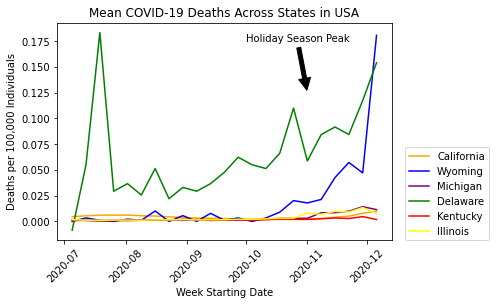

In [12]:
# plot 
# Can not plot mode with mean/median because there are multiple modes per week
plt.plot(dfCaliforniaDeathMean.index, dfCaliforniaDeathMean['mean'], color = 'orange', label = 'California')
plt.plot(dfWyomingDeathMean.index, dfWyomingDeathMean['mean'], color = 'blue', label = 'Wyoming')
plt.plot(dfMichiganDeathMean.index, dfMichiganDeathMean['mean'], color = 'purple', label = 'Michigan')
plt.plot(dfDelawareDeathMean.index, dfDelawareDeathMean['mean'], color = 'green', label = 'Delaware')
plt.plot(dfKentuckyDeathMean.index, dfKentuckyDeathMean['mean'], color = 'red', label = 'Kentucky')
plt.plot(dfIllinoisDeathMean.index, dfIllinoisDeathMean['mean'], color = 'yellow', label = 'Illinois')

#matplotlib.pyplot.annotate(text, xy, xytext=None, xycoords='data', 
                         #  textcoords=None, arrowprops=None, annotation_clip=None, **kwargs)[sour
    
 #xy=(2, 1), xytext=(3, 1.5),
  #          arrowprops=dict(facecolor='black', shrink=0.05
    
x = [dt.datetime(2020, 11, 1), dt.datetime(2020, 10, 1)]
y = [.125, .175]


plt.annotate('Holiday Season Peak', xy=(x[0], y[0]), xytext = (x[1], y[1]), 
             arrowprops = dict(facecolor = 'black', shrink = .05))
plt.xlabel('Week Starting Date') # x axis label
plt.ylabel('Deaths per 100,000 Individuals') # y axis label
plt.title('Mean COVID-19 Deaths Across States in USA') # Title
plt.xticks(rotation=45) # rotate dates
plt.legend(loc=(1.04, 0))


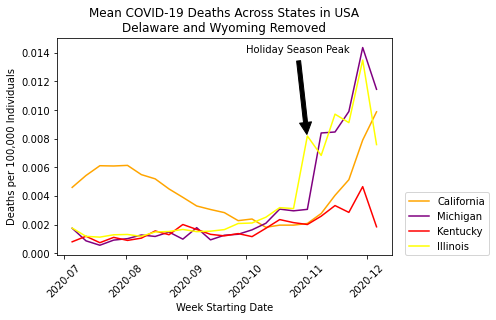

In [13]:
# plot 
# Can not plot mode with mean/median because there are multiple modes per week
plt.plot(dfCaliforniaDeathMean.index, dfCaliforniaDeathMean['mean'], color = 'orange', label = 'California')
#plt.plot(dfWyomingDeathMean.index, dfWyomingDeathMean['mean'], color = 'blue', label = 'Wyoming')
plt.plot(dfMichiganDeathMean.index, dfMichiganDeathMean['mean'], color = 'purple', label = 'Michigan')
#plt.plot(dfDelawareDeathMean.index, dfDelawareDeathMean['mean'], color = 'green', label = 'Delaware')
plt.plot(dfKentuckyDeathMean.index, dfKentuckyDeathMean['mean'], color = 'red', label = 'Kentucky')
plt.plot(dfIllinoisDeathMean.index, dfIllinoisDeathMean['mean'], color = 'yellow', label = 'Illinois')

#matplotlib.pyplot.annotate(text, xy, xytext=None, xycoords='data', 
                         #  textcoords=None, arrowprops=None, annotation_clip=None, **kwargs)[sour
    
 #xy=(2, 1), xytext=(3, 1.5),
  #          arrowprops=dict(facecolor='black', shrink=0.05
    
x = [dt.datetime(2020, 11, 1), dt.datetime(2020, 10, 1)]
y = [.008, .014]


plt.annotate('Holiday Season Peak', xy=(x[0], y[0]), xytext = (x[1], y[1]), 
             arrowprops = dict(facecolor = 'black', shrink = .05))
plt.xlabel('Week Starting Date') # x axis label
plt.ylabel('Deaths per 100,000 Individuals') # y axis label
plt.title('Mean COVID-19 Deaths Across States in USA\nDelaware and Wyoming Removed') # Title
plt.xticks(rotation=45) # rotate dates
plt.legend(loc=(1.04, 0))

# Median COVID-19 Deaths Across US States, per 100,000 individuals

The same trends can be seen in the median graph of the same data, the differences between the mean and median shapes indicate that a skew or outliers are evident in many of the states - so COVID-19 hit harder in some counties. Illinois and Kentucky show much flatter trends than the remaining states.  

When you remove the small states, the affect of the holidays can be seen across all remaining states.   Only the larger states exhibit trends that match up with the overall US graphs.

In future states of these graphs, I would use an interactive plotly graph so users can remove and add states as they please.

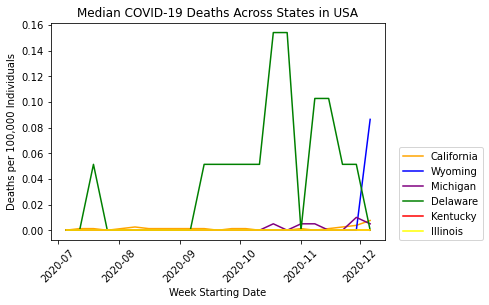

In [14]:
# plot 
# Can not plot mode with mean/median because there are multiple modes per week
plt.plot(dfCaliforniaDeathMedian.index, dfCaliforniaDeathMedian['median'], color = 'orange', label = 'California')
plt.plot(dfWyomingDeathMedian.index, dfWyomingDeathMedian['median'], color = 'blue', label = 'Wyoming')
plt.plot(dfMichiganDeathMedian.index, dfMichiganDeathMedian['median'], color = 'purple', label = 'Michigan')
plt.plot(dfDelawareDeathMedian.index, dfDelawareDeathMedian['median'], color = 'green', label = 'Delaware')
plt.plot(dfKentuckyDeathMedian.index, dfKentuckyDeathMedian['median'], color = 'red', label = 'Kentucky')
plt.plot(dfIllinoisDeathMedian.index, dfIllinoisDeathMedian['median'], color = 'yellow', label = 'Illinois')



plt.xlabel('Week Starting Date') # x axis label
plt.ylabel('Deaths per 100,000 Individuals') # y axis label
plt.title('Median COVID-19 Deaths Across States in USA') # Title
plt.xticks(rotation=45) # rotate dates
plt.legend(loc=(1.04, 0))

# Mean COVID-19 CASES Across US States, per 100,000 individuals

Wyoming and Delaware are significantly smaller in population than the other states in this analysis.  You can see in the graph, that by the middle to end of 2020, these smaller states showed much higher cases / 100,000 individuals.  This finding corresponds with findings from the Pew Research Group, which show that initially in the pandemic large cities were hit the hardest, but as late summer and fall hit there was a major shift in how population denisities were affected. Additionally, you can see the deaths increasing with the holiday season

When you remove the small states, the affect of the holidays can be seen across all remaining states.  
(https://www.pewresearch.org/politics/2020/12/08/the-changing-geography-of-covid-19-in-the-u-s/#:~:text=Less%20densely%20populated%20areas%20are,severely%20in%20dense%20urban%20centers.) 

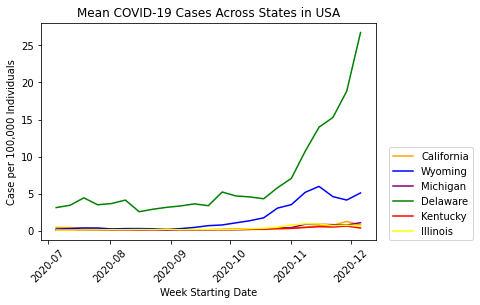

In [15]:
# plot 
# Can not plot mode with mean/median because there are multiple modes per week
plt.plot(dfCaliforniaCaseMean.index, dfCaliforniaCaseMean['mean'], color = 'orange', label = 'California')
plt.plot(dfWyomingCaseMean.index, dfWyomingCaseMean['mean'], color = 'blue', label = 'Wyoming')
plt.plot(dfMichiganCaseMean.index, dfMichiganCaseMean['mean'], color = 'purple', label = 'Michigan')
plt.plot(dfDelawareCaseMean.index, dfDelawareCaseMean['mean'], color = 'green', label = 'Delaware')
plt.plot(dfKentuckyCaseMean.index, dfKentuckyCaseMean['mean'], color = 'red', label = 'Kentucky')
plt.plot(dfIllinoisCaseMean.index, dfIllinoisCaseMean['mean'], color = 'yellow', label = 'Illinois')



plt.xlabel('Week Starting Date') # x axis label
plt.ylabel('Case per 100,000 Individuals') # y axis label
plt.title('Mean COVID-19 Cases Across States in USA') # Title
plt.xticks(rotation=45) # rotate dates
plt.legend(loc=(1.04, 0))


# Median COVID-19 Deaths Across US States, per 100,000 individuals

The date for the mean and median have very similar shapes for the case data, which indicates that there is less of an affect from outliers / skew in the case data.  This can be interpereted, within a state COVID affects the people at the same rate.  The death rates differ because access to health care differs throughout a state.  Small counties hospitals become overwhelmed at different rates than metroplitan hospitals, affecting death outcomes.

In future states of these graphs, I would use an interactive plotly graph so users can remove and add states as they please.

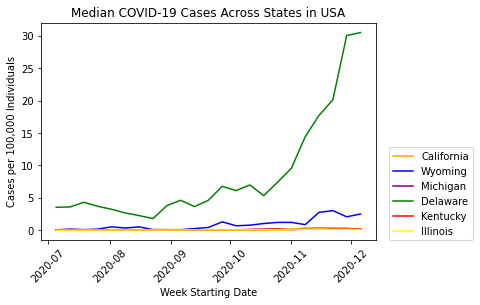

In [16]:
# plot 
# Can not plot mode with mean/median because there are multiple modes per week
plt.plot(dfCaliforniaCaseMedian.index, dfCaliforniaCaseMedian['median'], color = 'orange', label = 'California')
plt.plot(dfWyomingCaseMedian.index, dfWyomingCaseMedian['median'], color = 'blue', label = 'Wyoming')
plt.plot(dfMichiganCaseMedian.index, dfMichiganCaseMedian['median'], color = 'purple', label = 'Michigan')
plt.plot(dfDelawareCaseMedian.index, dfDelawareCaseMedian['median'], color = 'green', label = 'Delaware')
plt.plot(dfKentuckyCaseMedian.index, dfKentuckyCaseMedian['median'], color = 'red', label = 'Kentucky')
plt.plot(dfIllinoisCaseMedian.index, dfIllinoisCaseMedian['median'], color = 'yellow', label = 'Illinois')



plt.xlabel('Week Starting Date') # x axis label
plt.ylabel('Cases per 100,000 Individuals') # y axis label
plt.title('Median COVID-19 Cases Across States in USA') # Title
plt.xticks(rotation=45) # rotate dates
plt.legend(loc=(1.04, 0))

#Identify five counties within a state of your choice with high cases and death rates. Plot weekly trends (cases and deaths) for the top 5 infected counties. Show plots by raw values and log normalized values. Describe what is causing them and what were the peaks. Do the counties follow state pattern. Deliverable

In [17]:
dfCalifornia = pd.read_csv('ProjectDataStage1LONGFORMAT.csv')

In [18]:
dfCalifornia = pd.read_csv('ProjectDataStage1LONGFORMAT.csv')

# I have chosen to look at California
dfCalifornia = dfCalifornia[(dfCalifornia.State== "CA")] 

# normalizing for population
dfCalifornia['Cases'] = dfCalifornia['Cases'] / dfCalifornia['population'] * 100000
dfCalifornia['Deaths'] = dfCalifornia['Deaths'] / dfCalifornia['population']* 100000
dfCalifornia.dropna(inplace = True)
dfCalifornia.head()

#Trimming dates
dfCalifornia['Date'] = pd.to_datetime(dfCalifornia['Date'])

dfCalifornia = dfCalifornia[(dfCalifornia['Date'] > "2020-06-01") & (dfCalifornia['Date'] < "2020-12-01")]

# To identify the top affected counties, I am going to group by county and sum the total cases for all the data
# within the timeframe we are looking at.  This will be done on the per capita data.

df_subtotal = dfCalifornia.groupby('County Name', as_index=False)[['Deaths', 'Cases']].agg('sum')
df_subtotal=df_subtotal.sort_values(by = ['Cases'],ascending=False)
df_subtotal.head()

# identified couties from code above
counties = ['6025',
            '6031',
            '6037',
            '6107',
            '6083'
]

# filtering data for the identified coutnies
#df[~df['A'].isin([3, 6])]

dfCalifornia = dfCalifornia[dfCalifornia['CountyFIPS'].isin([6025, 6031, 6037, 6107, 6083])]
#dfCalifornia = dfCalifornia[dfCalifornia['CountyFIPS'].isin(counties)]

dfCalifornia.head(5)


,Unnamed: 0,Cases,CountyFIPS,County Name,State,StateFIPS,Date,Deaths,population
421811,421811,2254.228403,6025,Imperial County,CA,6,2020-06-02,33.661673,181215.0
421814,421814,833.660259,6031,Kings County,CA,6,2020-06-02,3.923107,152940.0
421817,421817,633.751588,6037,Los Angeles County,CA,6,2020-06-02,26.755368,10039107.0
421840,421840,474.805095,6083,Santa Barbara County,CA,6,2020-06-02,3.135505,446499.0
421852,421852,550.842459,6107,Tulare County,CA,6,2020-06-02,19.305226,466195.0


 # Top 5 Counties in California - Cases per 100,000 Individuals - Raw Values
 
 California does not exhibit peaks but does show an increase, caused by the holidays.  The shape is the same as California as a whole.  
 

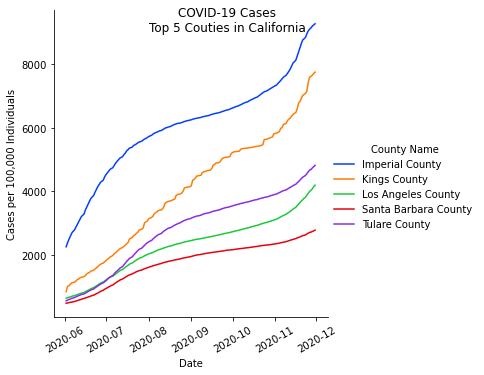

In [19]:
# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sns

# from seaborn.org
# seaborn.relplot(data=None, *, x=None, y=None, hue=None, size=None, style=None, units=None, row=None, col=None, 
# col_wrap=None, row_order=None, col_order=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, 
# size_norm=None, markers=None, dashes=None, style_order=None, legend='auto', kind='scatter', height=5, aspect=1, 
# facet_kws=None, **kwargs)

SummaryPlot = sns.relplot(data = dfCalifornia, 
            x = 'Date', 
            y = 'Cases', 
            hue = 'County Name', 
            palette = 'bright',
            kind = 'line')

SummaryPlot.set_xticklabels(rotation=30)
SummaryPlot.fig.suptitle('COVID-19 Cases\nTop 5 Couties in California')
SummaryPlot.set(ylabel='Cases per 100,000 Individuals', xlabel='Date')




In [20]:
import math
dfCalifornia['log_Cases'] = np.log10(dfCalifornia['Cases'])

dfCalifornia.head()

,Unnamed: 0,Cases,CountyFIPS,County Name,State,StateFIPS,Date,Deaths,population,log_Cases
421811,421811,2254.228403,6025,Imperial County,CA,6,2020-06-02,33.661673,181215.0,3.352998
421814,421814,833.660259,6031,Kings County,CA,6,2020-06-02,3.923107,152940.0,2.920989
421817,421817,633.751588,6037,Los Angeles County,CA,6,2020-06-02,26.755368,10039107.0,2.801919
421840,421840,474.805095,6083,Santa Barbara County,CA,6,2020-06-02,3.135505,446499.0,2.676515
421852,421852,550.842459,6107,Tulare County,CA,6,2020-06-02,19.305226,466195.0,2.741027


 # Top 5 Counties in California - Cases per 100,000 Individuals - LogNorm
 
The log norm graph does not bring any additional information.
 

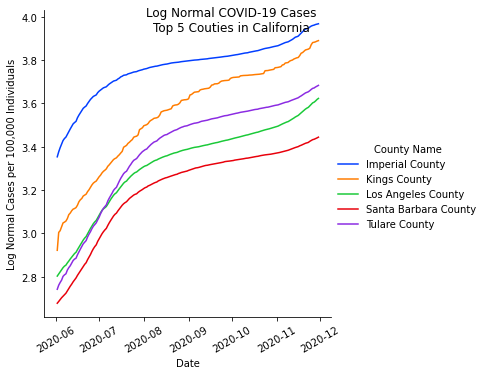

In [21]:
SummaryPlot = sns.relplot(data = dfCalifornia, 
            x = 'Date', 
            y = 'log_Cases', 
            hue = 'County Name', 
            palette = 'bright',
            kind = 'line')

SummaryPlot.set_xticklabels(rotation=30)
SummaryPlot.fig.suptitle('Log Normal COVID-19 Cases\nTop 5 Couties in California')
SummaryPlot.set(ylabel='Log Normal Cases per 100,000 Individuals', xlabel='Date')
